In [1]:
# Import packages

In [7]:
import nltk
import re
import gensim
import csv
import nltk.tokenize
nltk.download('punkt', quiet = True)


True

In [8]:
# Download the sample datasets
# Read in the text I am going to analyse
csv_file = 'imdb-spider-man-reviews-modify2.csv'

with open(csv_file, encoding='utf-8-sig') as text:
    lines = text.readlines()

print(lines[:4]) # this print the first 4 lines

for l in lines[:4]: # this prints the first 4 lines seperately
    print(l)


['Rating,Title,Date,Helpful_Vote,Total_Vote,Review,Movie\n', '10,Fantastic...but possibly overwhelming.,26-Mar-19,54,71,"""Spider-Man: Into the Spider-Verse"" is a fantastic film but might be a bit overwhelming for some viewers. It\'s filled with blaring hip-hop music and the animation is beyond splashy...it\'s competely intense! Now these are NOT criticisms...more a warning if you hate these sorts of things or if you or someone you loves has challenges, such as Autism....as the film might really be overwhelming. Still, I\'m nearly 55 and loved the picture...and I think most will if they have an open mind and want something different. That DOES strongly apply to me, as I\'ve gotten sick of superhero movies because there have been so many recently and there\'s a certain sameness about them...but not this Spider-Man film! The story is told with breathtaking CGI--with a look that is nothing like any other film I\'ve ever seen. In this world is a young man who sees Spider-Man killed and is

In [9]:
with open(csv_file, encoding='utf-8-sig') as text:
    reader = csv.reader(text)
    reviews = [row[5] for row in reader][1:]

for review in reviews[:4]:
    tokens = nltk.tokenize.word_tokenize(review)
    print(tokens)

['``', 'Spider-Man', ':', 'Into', 'the', 'Spider-Verse', "''", 'is', 'a', 'fantastic', 'film', 'but', 'might', 'be', 'a', 'bit', 'overwhelming', 'for', 'some', 'viewers', '.', 'It', "'s", 'filled', 'with', 'blaring', 'hip-hop', 'music', 'and', 'the', 'animation', 'is', 'beyond', 'splashy', '...', 'it', "'s", 'competely', 'intense', '!', 'Now', 'these', 'are', 'NOT', 'criticisms', '...', 'more', 'a', 'warning', 'if', 'you', 'hate', 'these', 'sorts', 'of', 'things', 'or', 'if', 'you', 'or', 'someone', 'you', 'loves', 'has', 'challenges', ',', 'such', 'as', 'Autism', '....', 'as', 'the', 'film', 'might', 'really', 'be', 'overwhelming', '.', 'Still', ',', 'I', "'m", 'nearly', '55', 'and', 'loved', 'the', 'picture', '...', 'and', 'I', 'think', 'most', 'will', 'if', 'they', 'have', 'an', 'open', 'mind', 'and', 'want', 'something', 'different', '.', 'That', 'DOES', 'strongly', 'apply', 'to', 'me', ',', 'as', 'I', "'ve", 'gotten', 'sick', 'of', 'superhero', 'movies', 'because', 'there', 'have'

In [10]:
# Function to recognize punctuation
punct_re = re.compile(r'[^\w\s]+$')
def is_punct(string):
    return punct_re.match(string) is not None

for review in reviews[:4]:
    tokens = nltk.tokenize.word_tokenize(review)
    # print(tokens)
    tokens_processed = [token for token in tokens if not is_punct(token)]
    print(tokens_processed)
    

['Spider-Man', 'Into', 'the', 'Spider-Verse', 'is', 'a', 'fantastic', 'film', 'but', 'might', 'be', 'a', 'bit', 'overwhelming', 'for', 'some', 'viewers', 'It', "'s", 'filled', 'with', 'blaring', 'hip-hop', 'music', 'and', 'the', 'animation', 'is', 'beyond', 'splashy', 'it', "'s", 'competely', 'intense', 'Now', 'these', 'are', 'NOT', 'criticisms', 'more', 'a', 'warning', 'if', 'you', 'hate', 'these', 'sorts', 'of', 'things', 'or', 'if', 'you', 'or', 'someone', 'you', 'loves', 'has', 'challenges', 'such', 'as', 'Autism', 'as', 'the', 'film', 'might', 'really', 'be', 'overwhelming', 'Still', 'I', "'m", 'nearly', '55', 'and', 'loved', 'the', 'picture', 'and', 'I', 'think', 'most', 'will', 'if', 'they', 'have', 'an', 'open', 'mind', 'and', 'want', 'something', 'different', 'That', 'DOES', 'strongly', 'apply', 'to', 'me', 'as', 'I', "'ve", 'gotten', 'sick', 'of', 'superhero', 'movies', 'because', 'there', 'have', 'been', 'so', 'many', 'recently', 'and', 'there', "'s", 'a', 'certain', 'samene

In [11]:
# Word2Vec needs sentences in a list.
data = []

for review in reviews[:4]:
    tokens = nltk.tokenize.word_tokenize(review)
    # print(tokens)
    tokens_processed = [token.lower() for token in tokens if not is_punct(token)]
    data.append(tokens_processed) # Add each line to the empty list you created above
print(data)


[['spider-man', 'into', 'the', 'spider-verse', 'is', 'a', 'fantastic', 'film', 'but', 'might', 'be', 'a', 'bit', 'overwhelming', 'for', 'some', 'viewers', 'it', "'s", 'filled', 'with', 'blaring', 'hip-hop', 'music', 'and', 'the', 'animation', 'is', 'beyond', 'splashy', 'it', "'s", 'competely', 'intense', 'now', 'these', 'are', 'not', 'criticisms', 'more', 'a', 'warning', 'if', 'you', 'hate', 'these', 'sorts', 'of', 'things', 'or', 'if', 'you', 'or', 'someone', 'you', 'loves', 'has', 'challenges', 'such', 'as', 'autism', 'as', 'the', 'film', 'might', 'really', 'be', 'overwhelming', 'still', 'i', "'m", 'nearly', '55', 'and', 'loved', 'the', 'picture', 'and', 'i', 'think', 'most', 'will', 'if', 'they', 'have', 'an', 'open', 'mind', 'and', 'want', 'something', 'different', 'that', 'does', 'strongly', 'apply', 'to', 'me', 'as', 'i', "'ve", 'gotten', 'sick', 'of', 'superhero', 'movies', 'because', 'there', 'have', 'been', 'so', 'many', 'recently', 'and', 'there', "'s", 'a', 'certain', 'samen

In [42]:
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re

import nltk
nltk.download('stopwords', quiet = True)
nltk.download('wordnet', quiet = True)
nltk.download('omw-1.4', quiet = True)

True

In [57]:
# Sentimental Analysis
# Read the coloum of Review
df = pd.read_csv('imdb-spider-man-reviews-modify2.csv', usecols=['Review'])

lemma = WordNetLemmatizer()
stop_words = stopwords.words('english')

# Function to deal with the review of dataset
def text_prep(x):
    corp = str(x).lower() 
    corp = re.sub('[^a-zA-Z]+',' ', corp).strip() 
    tokens = word_tokenize(corp)
    words = [t for t in tokens if t not in stop_words]
    lemmatize = [lemma.lemmatize(w) for w in words]
    return lemmatize
preprocess_tag = [text_prep(i) for i in df['Review']]

# output the preprocess_txt
df['preprocess_txt'] = preprocess_tag
# Caculate the total length of the text
df['total_len'] = df['preprocess_txt'].map(lambda x: len(x))

file = open('neg_words.txt', 'r')
neg_words = file.read().split()
file = open('pos_words.txt', 'r')
pos_words = file.read().split()
# Calculate the count of positive words in reviews
num_pos = df['preprocess_txt'].map(lambda x: len([i for i in x if i in pos_words]))
df['pos_count'] = num_pos
# Calculate the count of negative words in reviews
num_neg = df['preprocess_txt'].map(lambda x: len([i for i in x if i in neg_words]))
df['neg_count'] = num_neg
# Calculate the value of sentiment
df['sentiment'] = round((df['pos_count'] - df['neg_count']) / df['total_len'], 2)
print(df.head())

from sklearn.feature_extraction.text import CountVectorizer

# instantiate the CountVectorizer
vectorizer = CountVectorizer(stop_words='english')

# fit and transform the data
vectorized_data = vectorizer.fit_transform(df['Review'])

# convert the sparse matrix to a pandas dataframe
df_bag_of_words = pd.DataFrame.sparse.from_spmatrix(vectorized_data)

# set the column names to the words in the vocabulary
df_bag_of_words.columns = vectorizer.get_feature_names_out()

# add the sentiment column from the original dataframe
df_bag_of_words['sentiment'] = df['sentiment']

# print(df_bag_of_words['sentiment'])

                                              Review  \
0  "Spider-Man: Into the Spider-Verse" is a fanta...   
1  The worlds of superhero movies and superhero c...   
2  A movie worthy of Stan Lee's approval. Incredi...   
3  So many have commented, so I will be brief. Fr...   
4  Have you ever sat through a film and you knew ...   

                                      preprocess_txt  total_len  pos_count  \
0  [spider, man, spider, verse, fantastic, film, ...        128         10   
1  [world, superhero, movie, superhero, comic, si...        165         13   
2  [movie, worthy, stan, lee, approval, incredibl...         39          8   
3  [many, commented, brief, intriguing, plot, won...         41          6   
4  [ever, sat, film, knew, film, would, never, go...        110         16   

   neg_count  sentiment  
0         12      -0.02  
1          6       0.04  
2          2       0.15  
3          2       0.10  
4          2       0.13  


In [47]:
# Conclude the sentiment overall
positive = []
negative = []
for sentiment_value in df['sentiment']:
    if sentiment_value == 0:
        continue
    if sentiment_value > 0:
        positive.append(sentiment_value)
    else:
        negative.append(sentiment_value)
if len(positive) > len(negative):
    print('The movie "Spider-Man: Into the Spider-Verse" is overall positive.')
else:
    print('The movie "Spider-Man: Into the Spider-Verse" is overall negative.')
        

The movie "Spider-Man: Into the Spider-Verse" is overall positive.


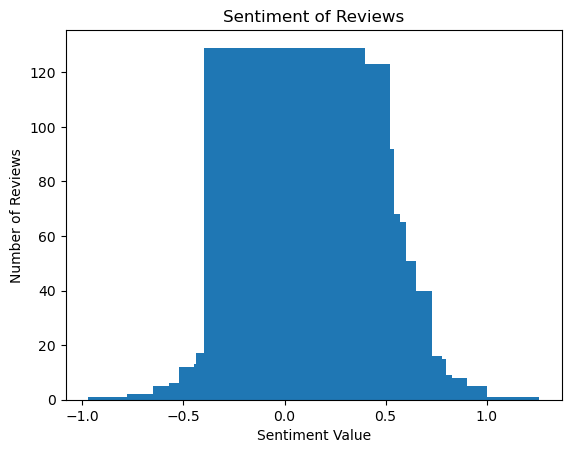

In [48]:
import matplotlib.pyplot as plt

# Group the reviews by their sentiment values
sentiment_counts = df.groupby('sentiment').size()

# Create a bar chart
plt.bar(sentiment_counts.index, sentiment_counts.values)

# Add title and labels to the plot
plt.title('Sentiment of Reviews')
plt.xlabel('Sentiment Value')
plt.ylabel('Number of Reviews')

# Show the plot
plt.show()